## Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image
import requests

In [3]:
from flask_app.commons import util

In [4]:
%load_ext autoreload
%autoreload 2

## Sample Images

In [14]:
source = Image.open('../demo_file/Kianboon_cropped.jpg')
ref = Image.open('../demo_file/samurai_1.jpg')

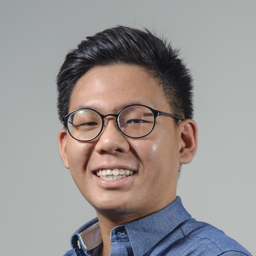

In [15]:
source.thumbnail((256,256))
source

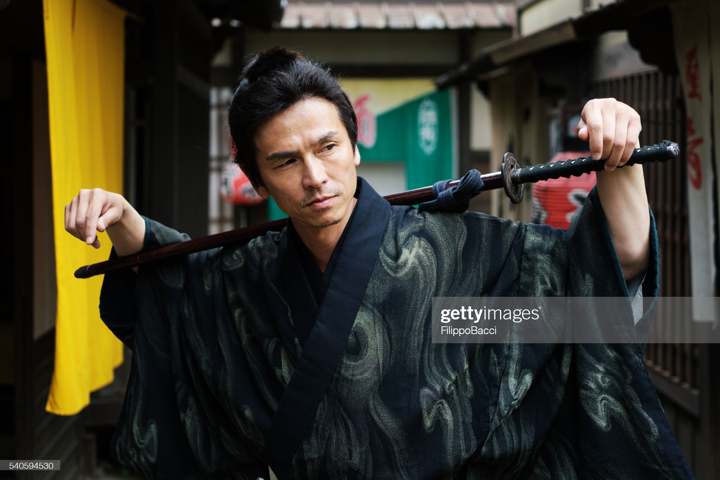

In [16]:
ref.thumbnail((720,720))
ref

## Calling Flask App

In [19]:
URL = "http://10.2.117.32:5001/predict"

In [27]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref)
}

__First Call (Will be a bit slower)__

In [28]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 3.13 ms, sys: 449 µs, total: 3.58 ms
Wall time: 996 ms


In [29]:
response_json = response.json()

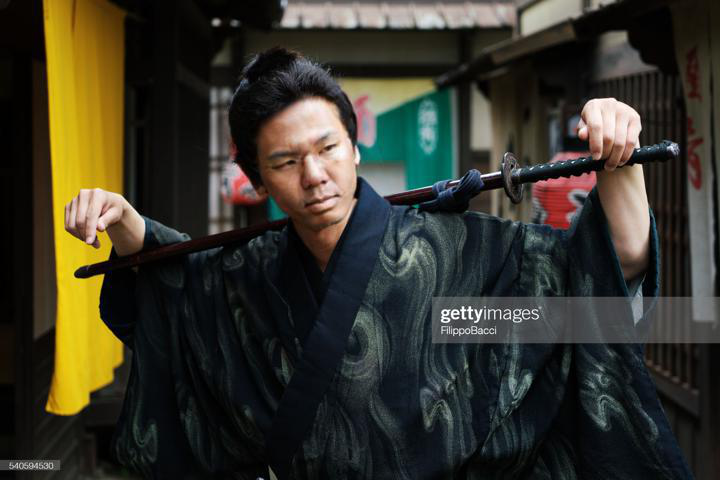

In [30]:
util.base64_to_image(response_json['output_img'])

__Second Call__

In [31]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.02 ms, sys: 134 µs, total: 5.15 ms
Wall time: 230 ms


## Another Sample

In [32]:
ref = Image.open('../demo_file/elf.jpg')

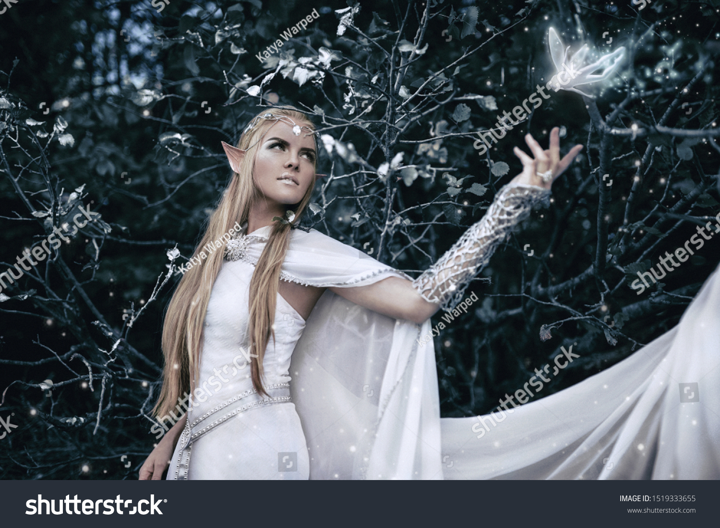

In [36]:
ref.thumbnail((720,720))
ref

In [38]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref)
}

In [39]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.06 ms, sys: 142 µs, total: 5.2 ms
Wall time: 258 ms


In [42]:
response_json = response.json()

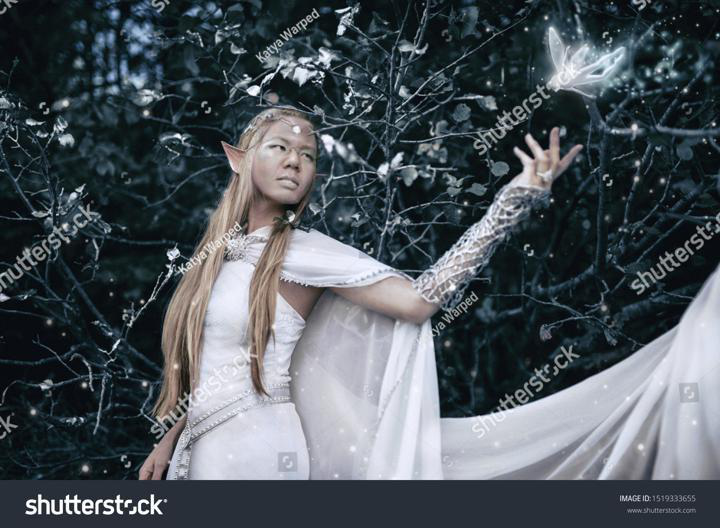

In [43]:
util.base64_to_image(response_json['output_img'])